## Business Case: Yulu - Hypothesis Testing

##### About Yulu
Yulu is India‚Äôs leading micro-mobility service provider, which offers unique vehicles for the daily
commute. Star∆üng off as a mission to eliminate traffic conges∆üon in India, Yulu provides the safest
commute solu∆üon through a user-friendly mobile app to enable shared, solo and sustainable
commu∆üng.
Yulu zones are located at all the appropriate loca∆üons (including metro sta∆üons, bus stands, office
spaces, residen∆üal areas, corporate offices, etc) to make those first and last miles smooth, affordable,
and convenient!
Yulu has recently suffered considerable dips in its revenues. They have contracted a consul∆üng
company to understand the factors on which the demand for these shared electric cycles depends.
Specifically, they want to understand the factors affec∆üng the demand for these shared electric cycles
in the Indian market.

A) Import the dataset and do usual exploratory data analysis
steps like checking the structure & characteristics of the
dataset.

In [250]:
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [252]:
df = pd.read_csv("Yulu.csv");

In [253]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [254]:
# no of rows amd columns in dataset
print(f"# rows: {df.shape[0]} \n# columns: {df.shape[1]}")

# rows: 10886 
# columns: 12


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## üîÑ Converting Data Types of Columns
- `datetime` ‚Üí `datetime`
- `season` ‚Üí `category`
- `holiday` ‚Üí `category`
- `workingday` ‚Üí `category`
- `weather` ‚Üí `category`


In [256]:
df['datetime'] = pd.to_datetime(df['datetime'])
cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [258]:
df.iloc[:,1:].describe(include='all')

season  holiday  workingday  weather         temp         atemp  \
count   10886.0  10886.0     10886.0  10886.0  10886.00000  10886.000000   
unique      4.0      2.0         2.0      4.0          NaN           NaN   
top         4.0      0.0         1.0      1.0          NaN           NaN   
freq     2734.0  10575.0      7412.0   7192.0          NaN           NaN   
mean        NaN      NaN         NaN      NaN     20.23086     23.655084   
std         NaN      NaN         NaN      NaN      7.79159      8.474601   
min         NaN      NaN         NaN      NaN      0.82000      0.760000   
25%         NaN      NaN         NaN      NaN     13.94000     16.665000   
50%         NaN      NaN         NaN      NaN     20.50000     24.240000   
75%         NaN      NaN         NaN      NaN     26.24000     31.060000   
max         NaN      NaN         NaN      NaN     41.00000     45.455000   

            humidity     windspeed        casual    registered         count  
count   10886.000000  10886.000000  10886.000000  10886.000000  10886.000000  
unique           NaN           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN           NaN  
mean       61.886460     12.799395     36.021955    155.552177    191.574132  
std        19.245033      8.164537     49.960477    151.039033    181.144454  
min         0.000000      0.000000      0.000000      0.000000      1.000000  
25%        47.000000      7.001500      4.000000     36.000000     42.000000  
50%        62.000000     12.998000     17.000000    118.000000    145.000000  
75%        77.000000     16.997900     49.000000    222.000000    284.000000  
max       100.000000     56.996900    367.000000    886.000000    977.000000

- There are no missing values in the dataset.  
- casual and registered attributes might have outliers because their mean and median are very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes.



In [259]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [260]:
df.season.value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [261]:
df.weather.value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [262]:
df.workingday.value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

Try establishing a relation between the
dependent and independent variable
(Dependent ‚ÄúCount‚Äù & Independent:
Workingday, Weather, Season etc)

# Univariate Analysis:

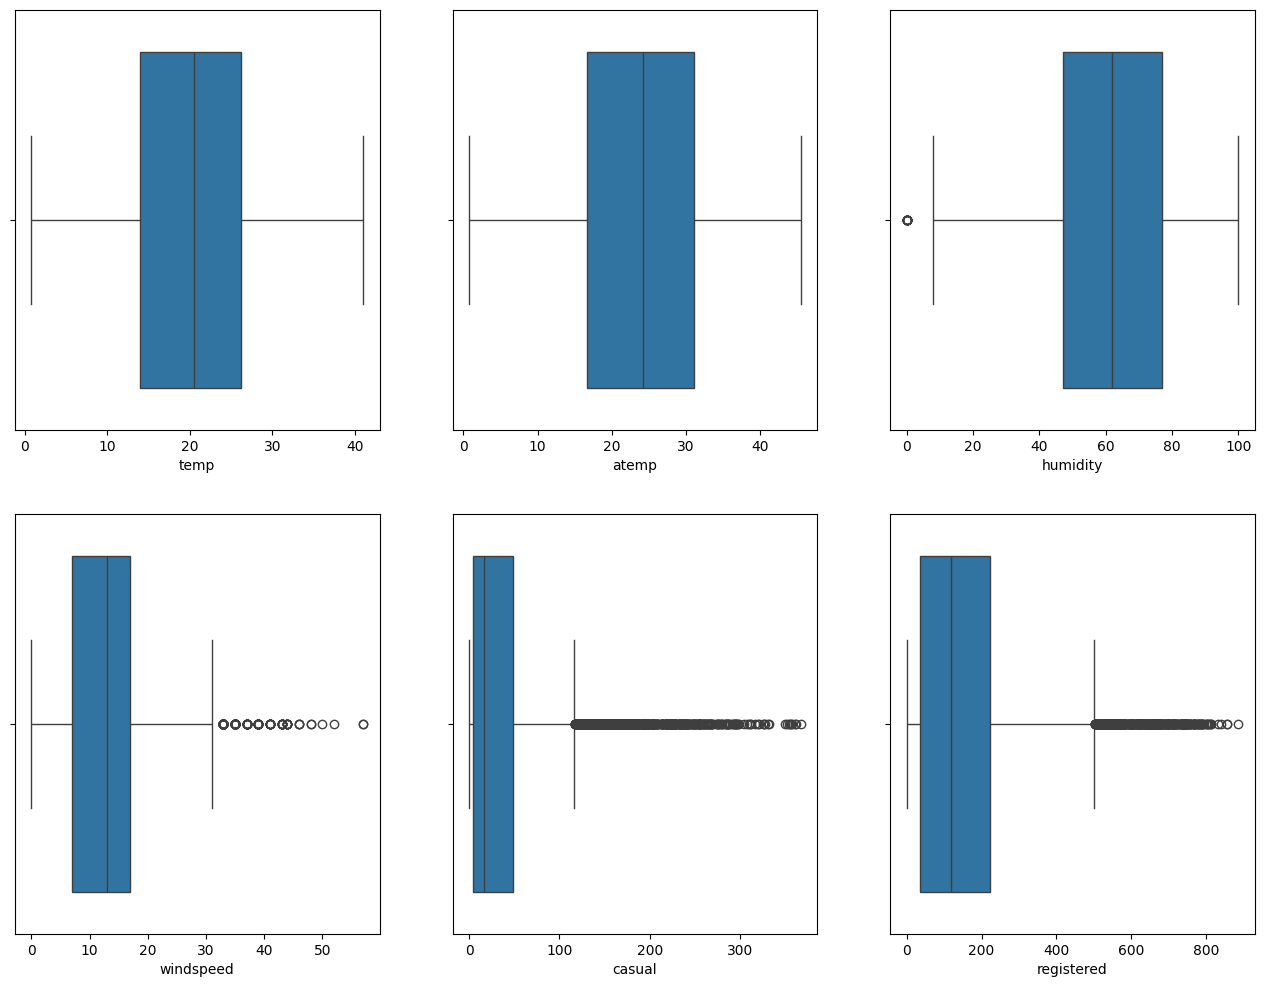

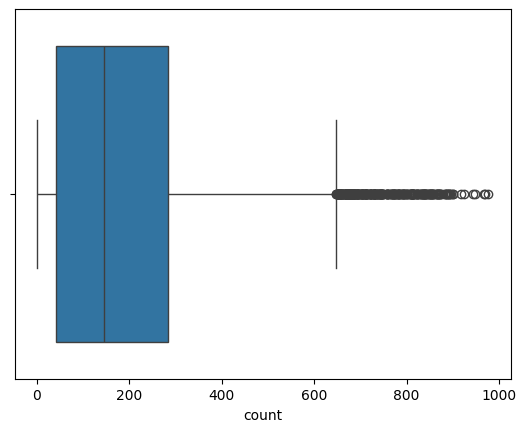

In [263]:
# plotting box plots to detect outliers in the data
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
        index += 1
plt.show()
sns.boxplot(x=df[num_cols[-1]])
plt.show()

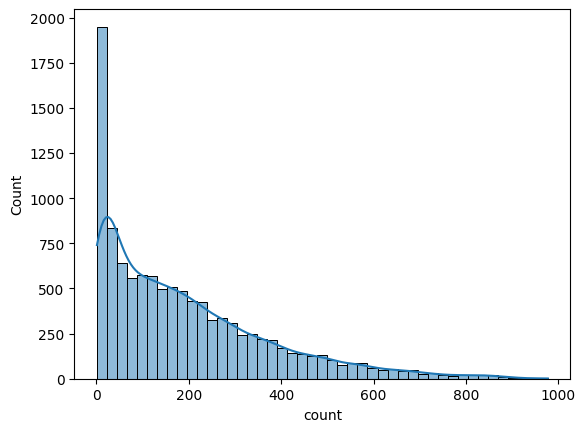

In [264]:
# understanding the distribution for numerical variables
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual',
'registered','count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1
plt.show()
sns.histplot(df[num_cols[-1]], kde=True)
plt.show()

<sub>‚Ä¢ 'casual', 'registered', and 'count' somewhat look like Log Normal Distribution  
‚Ä¢ 'temp', 'atemp', and 'humidity' appear to follow a Normal Distribution  
‚Ä¢ 'windspeed' seems to follow a Binomial Distribution</sub>


In [265]:

sns.boxplot(x='weather',y='count', data=df)

<Axes: xlabel='weather', ylabel='count'>

Looks like humidity, casual, registered and count have outliers in the data.

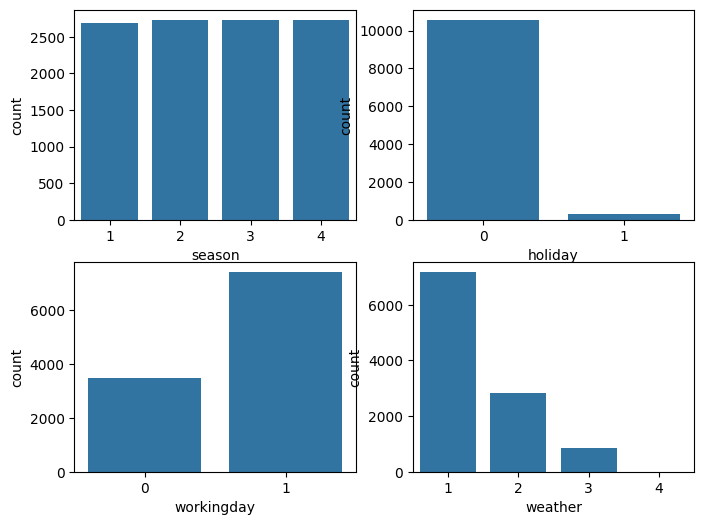

In [266]:
# countplot of each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
        index += 1
plt.show()

Data looks common as it should be like equal number of days in each season, more working
days and weather is mostly Clear, Few clouds, partly cloudy, partly cloudy.

<Axes: xlabel='workingday', ylabel='count'>

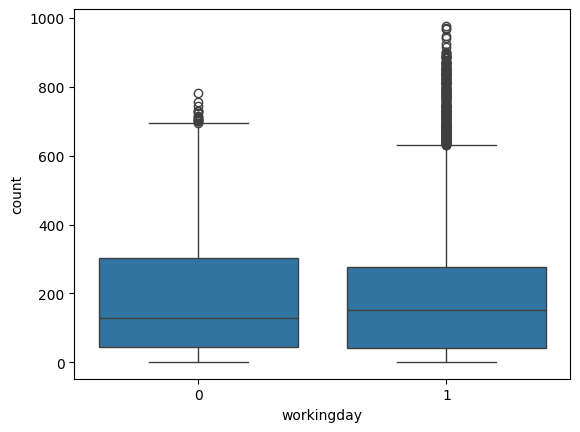

In [267]:
sns.boxplot(x='workingday',y='count', data=df)


<Axes: xlabel='weather', ylabel='count'>

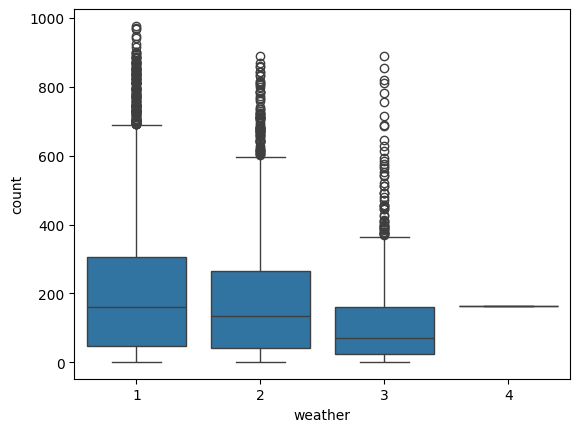

In [268]:
sns.boxplot(x='weather',y='count', data=df)


In [269]:
sns.boxplot(x='season',y='count', data=df)


<Axes: xlabel='season', ylabel='count'>

In [270]:
sns.boxplot(x='holiday',y='count', data=df)

<Axes: xlabel='holiday', ylabel='count'>

<sub>
‚Ä¢ In summer and fall seasons, more bikes are rented as compared to other seasons.  
<br>
‚Ä¢ Whenever it's a holiday, more bikes are rented.  
<br>
‚Ä¢ It is also clear from the workingday column that when the day is a holiday or weekend, slightly more bikes are rented.  
<br>
‚Ä¢ Whenever there is rain, thunderstorm, snow, or fog, fewer bikes are rented.  
</sub>


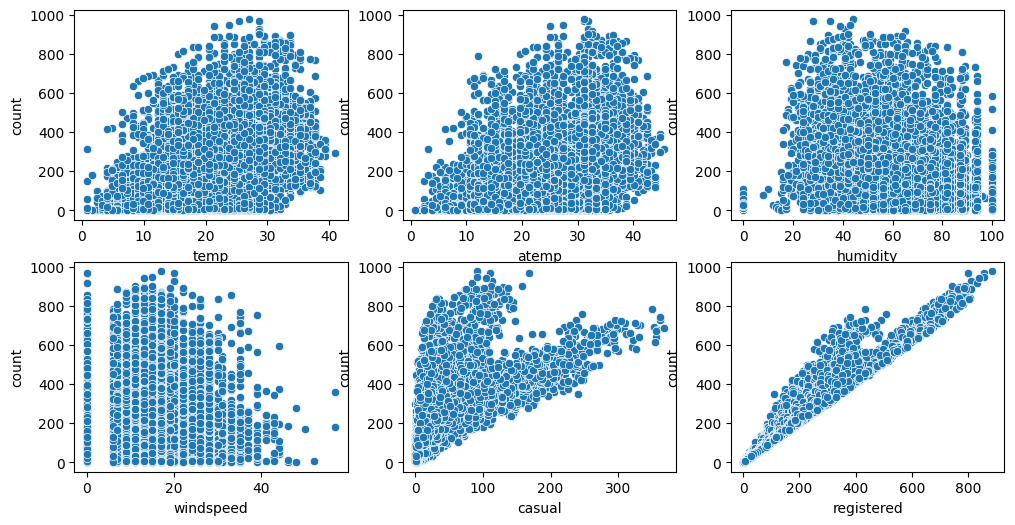

In [304]:
# plotting numerical variables againt count using scatterplot
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count',
        ax=axis[row, col])
        index += 1
plt.show()

<sub>
‚Ä¢ Whenever the humidity is less than 20, number of bikes rented is very very low.  
<br>
‚Ä¢ Whenever the temperature is less than 10, number of bikes rented is less.  
<br>
‚Ä¢ Whenever the windspeed is greater than 35, number of bikes rented is less.  
</sub>


In [308]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only relevant numerical columns
numerical_features = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='magma', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## 2: Hypothesis Testing

- **Chi-square test to check if Weather is dependent on the season**

**Null Hypothesis (H‚ÇÄ):** Weather is independent of the season  
**Alternate Hypothesis (H‚ÇÅ):** Weather is not independent of the season  
**Significance Level (Œ±):** 0.05


In [309]:
data_table = pd.crosstab(df['season'], df['weather'])
print("Observed values:")
data_table

Observed values:


weather     0    1    2  3
season                    
0        1759  715  211  1
1        1801  708  224  0
2        1930  604  199  0
3        1702  807  225  0

In [318]:
val = stats.chi2_contingency(data_table)
print(val)
expected_values = val[3]
print(expected_values)
nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)
alpha = 0.05

chi_sqr = sum([(o-e)**2/e for o, e in zip(data_table.values,
expected_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)
critical_val = stats.chi2.ppf(q=1-alpha, df=dof)
print(f"critical value: {critical_val}")
p_val = 1-stats.chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")
if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05,\nWe reject the Null Hypothesis.Meaning that Weather is dependent on the season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")

Chi2ContingencyResult(statistic=np.float64(49.158655596893624), pvalue=np.float64(1.549925073686492e-07), dof=9, expected_freq=array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))
[[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
degrees of freedom:  9
chi-square test statistic:  44.09441248632364
critical value: 16.918977604620448
p-value: 1.3560001579371317e-06

Since p-value is less than the alpha 0.05,
We reject the Null Hypothesis.Meaning that Weather is dependent on the season.


### 2-Sample T-Test to Check Effect of Working Day on Number of Electric Cycles Rented

**Null Hypothesis (H‚ÇÄ):**  
Working day has **no effect** on the number of cycles being rented.

**Alternate Hypothesis (H‚ÇÅ):**  
Working day **has an effect** on the number of cycles being rented.

**Significance Level (Œ±):** 0.05

We will use the **2-Sample T-Test** to test the hypothesis defined above.

Before conducting the two-sample T-Test we need to find if the given data groups have
the same variance. If the ratio of the larger data groups to the small data group is less
than 4:1 then we can consider that the given data groups have equal variance.


In [320]:
data_group1 = df[df['workingday']==0]['count'].values
data_group2 = df[df['workingday']==1]['count'].values
print(np.var(data_group1), np.var(data_group2))
np.var(data_group2)// np.var(data_group1)

30171.346098942427 34040.69710674686


np.float64(1.0)

Here, the ratio is 34040.70 / 30171.35 which is less than 4:1

In [322]:
result = stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

print(f"T-statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")

T-statistic: -1.2096277376026694
P-value: 0.22644804226361348


Since pvalue is greater than 0.05 so we cannot reject the Null hypothesis. We don't
have the sufficient evidence to say that working day has effect on the number of
cycles being rented.

#### ANOVA to Check if Number of Cycles Rented is Similar or Different Across

1. Weather  
2. Season

**Null Hypothesis (H‚ÇÄ):**  
Number of cycles rented is **similar** in different weather conditions and seasons.

**Alternate Hypothesis (H‚ÇÅ):**  
Number of cycles rented is **not similar** in different weather conditions and seasons.

**Significance Level (Œ±):** 0.05


In [336]:

from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

In [347]:
index = 0
for row in range(4):
for col in range(2):
qqplot(groups[index], line="s")
index += 1
plt.show()
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(8, 8))
index = 0
for row in range(4):
for col in range(2):
sns.histplot(groups[index], ax=axis[row, col], kde=True)
index += 1
plt.show()


IndentationError: expected an indented block after 'for' statement on line 2 (2481416723.py, line 3)

- As per above graphs, all groups are not following Gaussian distribution

- 2: Data is Independent

- 3: Equal variance: Levene's Test



In [350]:
#Null Hypothesis: Variances is similar in different weather and season.
#Alternate Hypothesis: Variances is not similar in different weather and season.
#Significance level (alpha): 0.05
levene_stat, p_value = stats.levene(gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8)
print(p_value)
if p_value < 0.05:
    print("Reject the Null hypothesis.Variances are not equal")
else:
    print("Fail to Reject the Null hypothesis.Variances are equal")

NameError: name 'gp1' is not defined

- **p-value:** 3.463531888897594e-148  
- **Decision:** Reject the null hypothesis ‚Äî variances are **not** equal.

---

### Conclusion:
- Based on the **Q-Q plots** and **Levene‚Äôs Test**, the assumptions of ANOVA (normality and equal variance) are violated.
- ‚ùå **ANOVA cannot be used.**
- ‚úÖ **Use the Kruskal-Wallis H-test** as a non-parametric alternative.
